### <span style = "color:orange">1. Introduction<span>

#### <span style="color:green">1.1. Project purpose</span>

Xây dựng và đánh giá tập hợp các mô hình dự báo chuỗi thời gian để dự đoán nhiệt độ cực đại hàng ngày tại các khu vực đô thị và ven biển Việt Nam. Dự án áp dụng cả thuật toán Machine Learning truyền thống và Deep Learning hiện đại nhằm cải thiện độ chính xác dự báo so với các phương pháp thống kê thông thường.

<b>Nguồn dữ liệu</b>: Bộ dữ liệu ERA5 (ECMWF) với các bản ghi nhiệt độ từ 1990 đến 2024, được xử lý và biến đổi để huấn luyện các mô hình như Random Forest, XGBoost, LSTM, Transformer, TFT, và N-BEATS.

<b>Kết quả</b>: Đánh giá hiệu năng giữa các mô hình qua nhiều kịch bản thực nghiệm và đề xuất hệ thống cảnh báo nhiệt độ sớm ứng dụng thực tế.

#### <span style="color:green">1.2. Data source and description</span>

<h4>Thông tin dữ liệu trong đề tài:</h4>

<ul>
<li><b>Thời gian thu thập:</b> từ năm <b>1990 đến 2024</b></li>
<li><b>Định dạng ban đầu:</b> .grib, sau đó chuyển đổi sang .csv để xử lý</li>
</ul>

<h4>Các biến số chính trong tập dữ liệu:</h4>

<table>
<thead>
<tr>
<th>Tên cột dữ liệu</th>
<th>Ý nghĩa</th>
<th>Đơn vị đo</th>
</tr>
</thead>
<tbody>
<tr><td><code>NAME</code></td><td>Tên tỉnh/thành phố nơi thu thập dữ liệu</td><td>-</td></tr>
<tr><td><code>LATITUDE</code></td><td>Vĩ độ địa lý của điểm đo</td><td>Độ</td></tr>
<tr><td><code>LONGITUDE</code></td><td>Kinh độ địa lý của điểm đo</td><td>Độ</td></tr>
<tr><td><code>YMD</code></td><td>Ngày/tháng/năm đo đạc</td><td>dd/mm/yyyy</td></tr>
<tr><td><code>YEAR</code></td><td>Năm đo đạc</td><td>Năm</td></tr>
<tr><td><code>MONTH</code></td><td>Tháng đo đạc</td><td>Tháng</td></tr>
<tr><td><code>DAY</code></td><td>Ngày đo đạc</td><td>Ngày</td></tr>
<tr><td><code>TEMP_max</code></td><td>Nhiệt độ không khí cực đại trong ngày</td><td>°C</td></tr>
<tr><td><code>TEMP_ave</code></td><td>Nhiệt độ trung bình trong ngày</td><td>°C</td></tr>
<tr><td><code>DEW_ave</code></td><td>Điểm sương trung bình trong ngày</td><td>°C</td></tr>
<tr><td><code>DEW_max</code></td><td>Điểm sương cao nhất trong ngày</td><td>°C</td></tr>
<tr><td><code>RH_ave</code></td><td>Độ ẩm tương đối trung bình trong ngày</td><td>%</td></tr>
<tr><td><code>RH_max</code></td><td>Độ ẩm tương đối cực đại trong ngày</td><td>%</td></tr>
<tr><td><code>AT_ave</code></td><td>Nhiệt độ cảm nhận trung bình trong ngày (Apparent Temp.)</td><td>°C</td></tr>
<tr><td><code>AT_max</code></td><td>Nhiệt độ cảm nhận cao nhất trong ngày</td><td>°C</td></tr>
</tbody>
</table>

<p><b>Biến mục tiêu chính:</b></p>
<ul>
<li><code>TEMP_max</code> — Nhiệt độ không khí cực đại hàng ngày (°C)</li>
</ul>

<p><b>Lưu ý:</b> Dữ liệu gốc của ERA5 có thể chứa giá trị thiếu, giá trị ngoại lai và một số dị bản khí tượng đặc thù. Do đó, quá trình làm sạch dữ liệu, xử lý giá trị thiếu, phát hiện ngoại lệ và chuẩn hóa dữ liệu là các bước bắt buộc trước khi tiến hành huấn luyện và dự báo.</p>

In [2]:
match_type = {
    'NAME'       : 'Categorical',        # Tên tỉnh/thành phố (chuỗi)
    'LATITUDE'   : 'Numerical',          # Vĩ độ (°)
    'LONGITUDE'  : 'Numerical',          # Kinh độ (°)
    'YMD'        : 'Datetime',           # Ngày/tháng/năm (dd/mm/yyyy)
    'YEAR'       : 'Numerical',          # Năm (năm)
    'MONTH'      : 'Numerical',          # Tháng (1-12)
    'DAY'        : 'Numerical',          # Ngày (1-31)

    'TEMP_max'   : 'Numerical',          # Nhiệt độ cực đại trong ngày (°C)
    'TEMP_ave'   : 'Numerical',          # Nhiệt độ trung bình trong ngày (°C)
    'DEW_ave'    : 'Numerical',          # Điểm sương trung bình trong ngày (°C)
    'DEW_max'    : 'Numerical',          # Điểm sương cực đại trong ngày (°C)
    'RH_ave'     : 'Numerical',          # Độ ẩm tương đối trung bình trong ngày (%)
    'RH_max'     : 'Numerical',          # Độ ẩm tương đối cực đại trong ngày (%)
    'AT_ave'     : 'Numerical',          # Nhiệt độ cảm nhận trung bình trong ngày (°C)
    'AT_max'     : 'Numerical'           # Nhiệt độ cảm nhận cực đại trong ngày (°C)
}

#### <span style="color:green">1.3. Goals</span>

<img src="../image/Ảnh chụp màn hình 2025-06-24 210616.png">

### <span style="color:orange">2. Import Libraries</span>

#### <span style="color:green">2.1. Configuration and display settings</span>

In [3]:
import sys
sys.path.append("../")  # đường dẫn đến thư mục chứa src

from src import (config, 
                 dataset, 
                 features, 
                 plots)

#### <span style="color:green">2.2. Required Python packages</span>

In [4]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import metpy
import metpy.calc

from metpy.units import units
from copy        import deepcopy

### <span style="color:orange">3. Data Loading</span>

In [5]:
src = dict({"CaMau" :"../data/processed/datasets/CaMau90.24_cleaned.csv",
            "NB"    : "../data/processed/datasets/NB90.24_cleaned.csv",
            "QN"    : "../data/processed/datasets/QN90.24_cleaned.csv",
            "TSN"   : "../data/processed/datasets/TSN90.24_cleaned.csv"})

#### <span style="color:green">3.1. Loading the dataset</span>

In [6]:
df = pd.read_csv(filepath_or_buffer = src["CaMau"],
                 parse_dates        = True,
                 index_col          = "time")

#### <span style="color:green">3.2. Displaying first few rows</span>

In [7]:
df.head()

,latitude,longitude,ymd,year,month,day,number,step,surface,sp,tcc,tp,u10,v10,wind_speed,wind_direction_deg
time,,,,,,,,,,,,,,,,
1990-01-01 00:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,0.004637,-0.372383,0.391136,0.540052,136.407024
1990-01-01 01:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,0.004637,-0.372383,0.391136,0.540052,136.407024
1990-01-01 02:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,0.004637,-0.372383,0.391136,0.540052,136.407024
1990-01-01 03:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,0.004637,-0.372383,0.391136,0.540052,136.407024
1990-01-01 04:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,0.004637,-0.372383,0.391136,0.540052,136.407024


In [8]:
df.tail()

,latitude,longitude,ymd,year,month,day,number,step,surface,sp,tcc,tp,u10,v10,wind_speed,wind_direction_deg
time,,,,,,,,,,,,,,,,
2025-01-01 09:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.44,1.0,0.000517,0.135825,-2.628218,2.631725,357.041615
2025-01-01 10:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.44,1.0,0.000517,0.135825,-2.628218,2.631725,357.041615
2025-01-01 11:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.44,1.0,0.000517,0.135825,-2.628218,2.631725,357.041615
2025-01-01 12:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.44,1.0,0.000517,0.135825,-2.628218,2.631725,357.041615
2025-01-01 13:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.44,1.0,0.000517,0.135825,-2.628218,2.631725,357.041615


#### <span style="color:green">3.3. Data summary</span>

In [9]:
df.shape

(306830, 16)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 306830 entries, 1990-01-01 00:00:00+07:00 to 2025-01-01 13:00:00+07:00
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   latitude            306830 non-null  float64
 1   longitude           306830 non-null  float64
 2   ymd                 306830 non-null  object 
 3   year                306830 non-null  int64  
 4   month               306830 non-null  int64  
 5   day                 306830 non-null  int64  
 6   number              306830 non-null  float64
 7   step                306830 non-null  object 
 8   surface             306830 non-null  float64
 9   sp                  306830 non-null  float64
 10  tcc                 306830 non-null  float64
 11  tp                  306830 non-null  float64
 12  u10                 306830 non-null  float64
 13  v10                 306830 non-null  float64
 14  wind_speed          306830 non-null  f

In [11]:
df.describe()

,latitude,longitude,year,month,day,number,surface,sp,tcc,tp,u10,v10,wind_speed,wind_direction_deg
count,3.068300e+05,3.068300e+05,306830.000000,306830.000000,306830.000000,306830.0,306830.0,306830.000000,306830.000000,306830.000000,306830.000000,306830.000000,306830.000000,306830.000000
mean,9.180000e+00,1.051500e+02,2007.001525,6.522589,15.729225,0.0,0.0,100974.948897,0.750857,0.009729,-0.274956,0.291744,2.834269,163.716477
std,5.329079e-15,7.105439e-14,10.100220,3.448856,8.800578,0.0,0.0,213.505782,0.301445,0.013061,2.893074,1.230089,1.417958,87.374036
min,9.180000e+00,1.051500e+02,1990.000000,1.000000,1.000000,0.0,0.0,100511.767400,0.000000,0.000000,-9.211976,-2.933595,0.004248,0.006132
25%,9.180000e+00,1.051500e+02,1998.000000,4.000000,8.000000,0.0,0.0,100824.500000,0.548593,0.000569,-2.492012,-0.483519,1.721899,86.261094
50%,9.180000e+00,1.051500e+02,2007.000000,7.000000,16.000000,0.0,0.0,100962.625000,0.909145,0.004637,-0.372383,0.391136,2.648919,147.891674
75%,9.180000e+00,1.051500e+02,2016.000000,10.000000,23.000000,0.0,0.0,101113.940000,0.990941,0.013274,1.987964,1.149865,3.780096,246.692280
max,9.180000e+00,1.051500e+02,2025.000000,12.000000,31.000000,0.0,0.0,101521.606150,1.000000,0.062530,8.654032,3.599941,9.339478,359.996070


### <span style="color:orange">4. Exploratory Data Analysis (EDA)</span>

#### <span style="color:green">4.1. Explore Categorical Variables</span>

##### <span style="color:tomato">Summary Statistics</span>

In [12]:
categorical = df.select_dtypes(include='object').columns
print(f'There are {len(categorical)} categorical variables\n')
print('The categorical variables are :\n\n', categorical)

There are 2 categorical variables

The categorical variables are :

 Index(['ymd', 'step'], dtype='object')


Frequency counts

In [13]:
dataset.frequency_counts(df, categorical)

ymd
15/12/2024    24/306830
14/12/2024    24/306830
13/12/2024    24/306830
12/12/2024    24/306830
11/12/2024    24/306830
                ...    
4/1/1990      24/306830
3/1/1990      24/306830
2/1/1990      24/306830
1/1/1990      24/306830
1/1/2025      14/306830
Name: count, Length: 12785, dtype: object

step
0 days    306830/306830
Name: count, dtype: object



Frequency distributions

In [14]:
dataset.frequency_distributions(df, categorical)

ymd
15/12/2024    0.007822%
14/12/2024    0.007822%
13/12/2024    0.007822%
12/12/2024    0.007822%
11/12/2024    0.007822%
                ...    
4/1/1990      0.007822%
3/1/1990      0.007822%
2/1/1990      0.007822%
1/1/1990      0.007822%
1/1/2025      0.004563%
Name: count, Length: 12785, dtype: object

step
0 days    100.000000%
Name: count, dtype: object



#### <span style="color:green">4.2. Explore Numerical Variables</span>

##### <span style="color:tomato">Summary Statistics</span>

In [15]:
numerical = df.select_dtypes(include='number').columns
print(f'There are {len(numerical)} numerical variables')
print('The numerical variables are :\n\n', numerical)

There are 14 numerical variables
The numerical variables are :

 Index(['latitude', 'longitude', 'year', 'month', 'day', 'number', 'surface',
       'sp', 'tcc', 'tp', 'u10', 'v10', 'wind_speed', 'wind_direction_deg'],
      dtype='object')


Frequency counts

In [16]:
dataset.frequency_counts(df, numerical)

latitude
9.18    306830/306830
Name: count, dtype: object

longitude
105.15    306830/306830
Name: count, dtype: object

year
1992    8784/306830
2008    8784/306830
2000    8784/306830
1996    8784/306830
2020    8784/306830
2024    8784/306830
2016    8784/306830
2004    8784/306830
2012    8784/306830
1993    8760/306830
1990    8760/306830
1991    8760/306830
2001    8760/306830
1999    8760/306830
2003    8760/306830
2002    8760/306830
1997    8760/306830
1998    8760/306830
1995    8760/306830
1994    8760/306830
2009    8760/306830
2007    8760/306830
2006    8760/306830
2005    8760/306830
2013    8760/306830
2014    8760/306830
2011    8760/306830
2010    8760/306830
2017    8760/306830
2015    8760/306830
2019    8760/306830
2018    8760/306830
2021    8760/306830
2022    8760/306830
2023    8760/306830
2025      14/306830
Name: count, dtype: object

month
1     26054/306830
3     26040/306830
7     26040/306830
5     26040/306830
12    26040/306830
10    26040/306830
8     

Frequency distributions

In [17]:
dataset.frequency_distributions(df, numerical)

latitude
9.18    100.000000%
Name: count, dtype: object

longitude
105.15    100.000000%
Name: count, dtype: object

year
1992    2.862823%
2008    2.862823%
2000    2.862823%
1996    2.862823%
2020    2.862823%
2024    2.862823%
2016    2.862823%
2004    2.862823%
2012    2.862823%
1993    2.855001%
1990    2.855001%
1991    2.855001%
2001    2.855001%
1999    2.855001%
2003    2.855001%
2002    2.855001%
1997    2.855001%
1998    2.855001%
1995    2.855001%
1994    2.855001%
2009    2.855001%
2007    2.855001%
2006    2.855001%
2005    2.855001%
2013    2.855001%
2014    2.855001%
2011    2.855001%
2010    2.855001%
2017    2.855001%
2015    2.855001%
2019    2.855001%
2018    2.855001%
2021    2.855001%
2022    2.855001%
2023    2.855001%
2025    0.004563%
Name: count, dtype: object

month
1     8.491347%
3     8.486784%
7     8.486784%
5     8.486784%
12    8.486784%
10    8.486784%
8     8.486784%
4     8.213017%
9     8.213017%
6     8.213017%
11    8.213017%
2     7.735880%
Name

Visualizing the statistics of the columns using heatmap.

### <span style="color:orange">5. Data Visualization</span>

#### <span style="color:green">5.1. Distribution Plots</span>

##### <span style="color:tomato">Histograms</span>

In [ ]:
# # cols_not_included = ["class"]
# num_cols = len(numerical) + len(categorical)

# # Xác định số hàng và số cột hợp lý
# ncols = 3  # Số biểu đồ trên mỗi hàng
# nrows = int(np.ceil(num_cols / ncols))  # Tính số hàng cần thiết

# fig, axes = plt.subplots(
#     ncols   = ncols, 
#     nrows   = nrows, 
#     figsize = (5*ncols, 4*nrows)
# )
# axes = axes.flatten()  # chuyển mảng 2 chiều thành 1 chiều để dễ duyệt

# for i,column in enumerate(numerical.append(categorical)):
#     sns.histplot(
#         data = train_df, 
#         x    = column,
#         kde  = True,
#         ax   = axes[i]
#     )
#     axes[i].set_title(f'Histogram of {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('Frequency')
#     axes[i].grid(True)

# # Ẩn các subplot dư nếu có
# for j in range(i+1, len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()

C:\Users\tanda\AppData\Local\Temp\ipykernel_1228\2083674227.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], color='r', shade=True)  # dùng kdeplot thay vì histplot
C:\Users\tanda\AppData\Local\Temp\ipykernel_1228\2083674227.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], color='r', shade=True)  # dùng kdeplot thay vì histplot
C:\Users\tanda\AppData\Local\Temp\ipykernel_1228\2083674227.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[column], color='r', shade=True)  # dùng kdeplot thay vì histplot
C:\Users\tanda\AppData\Local\Temp\ipykernel_1228\2083674227.py:7: FutureW

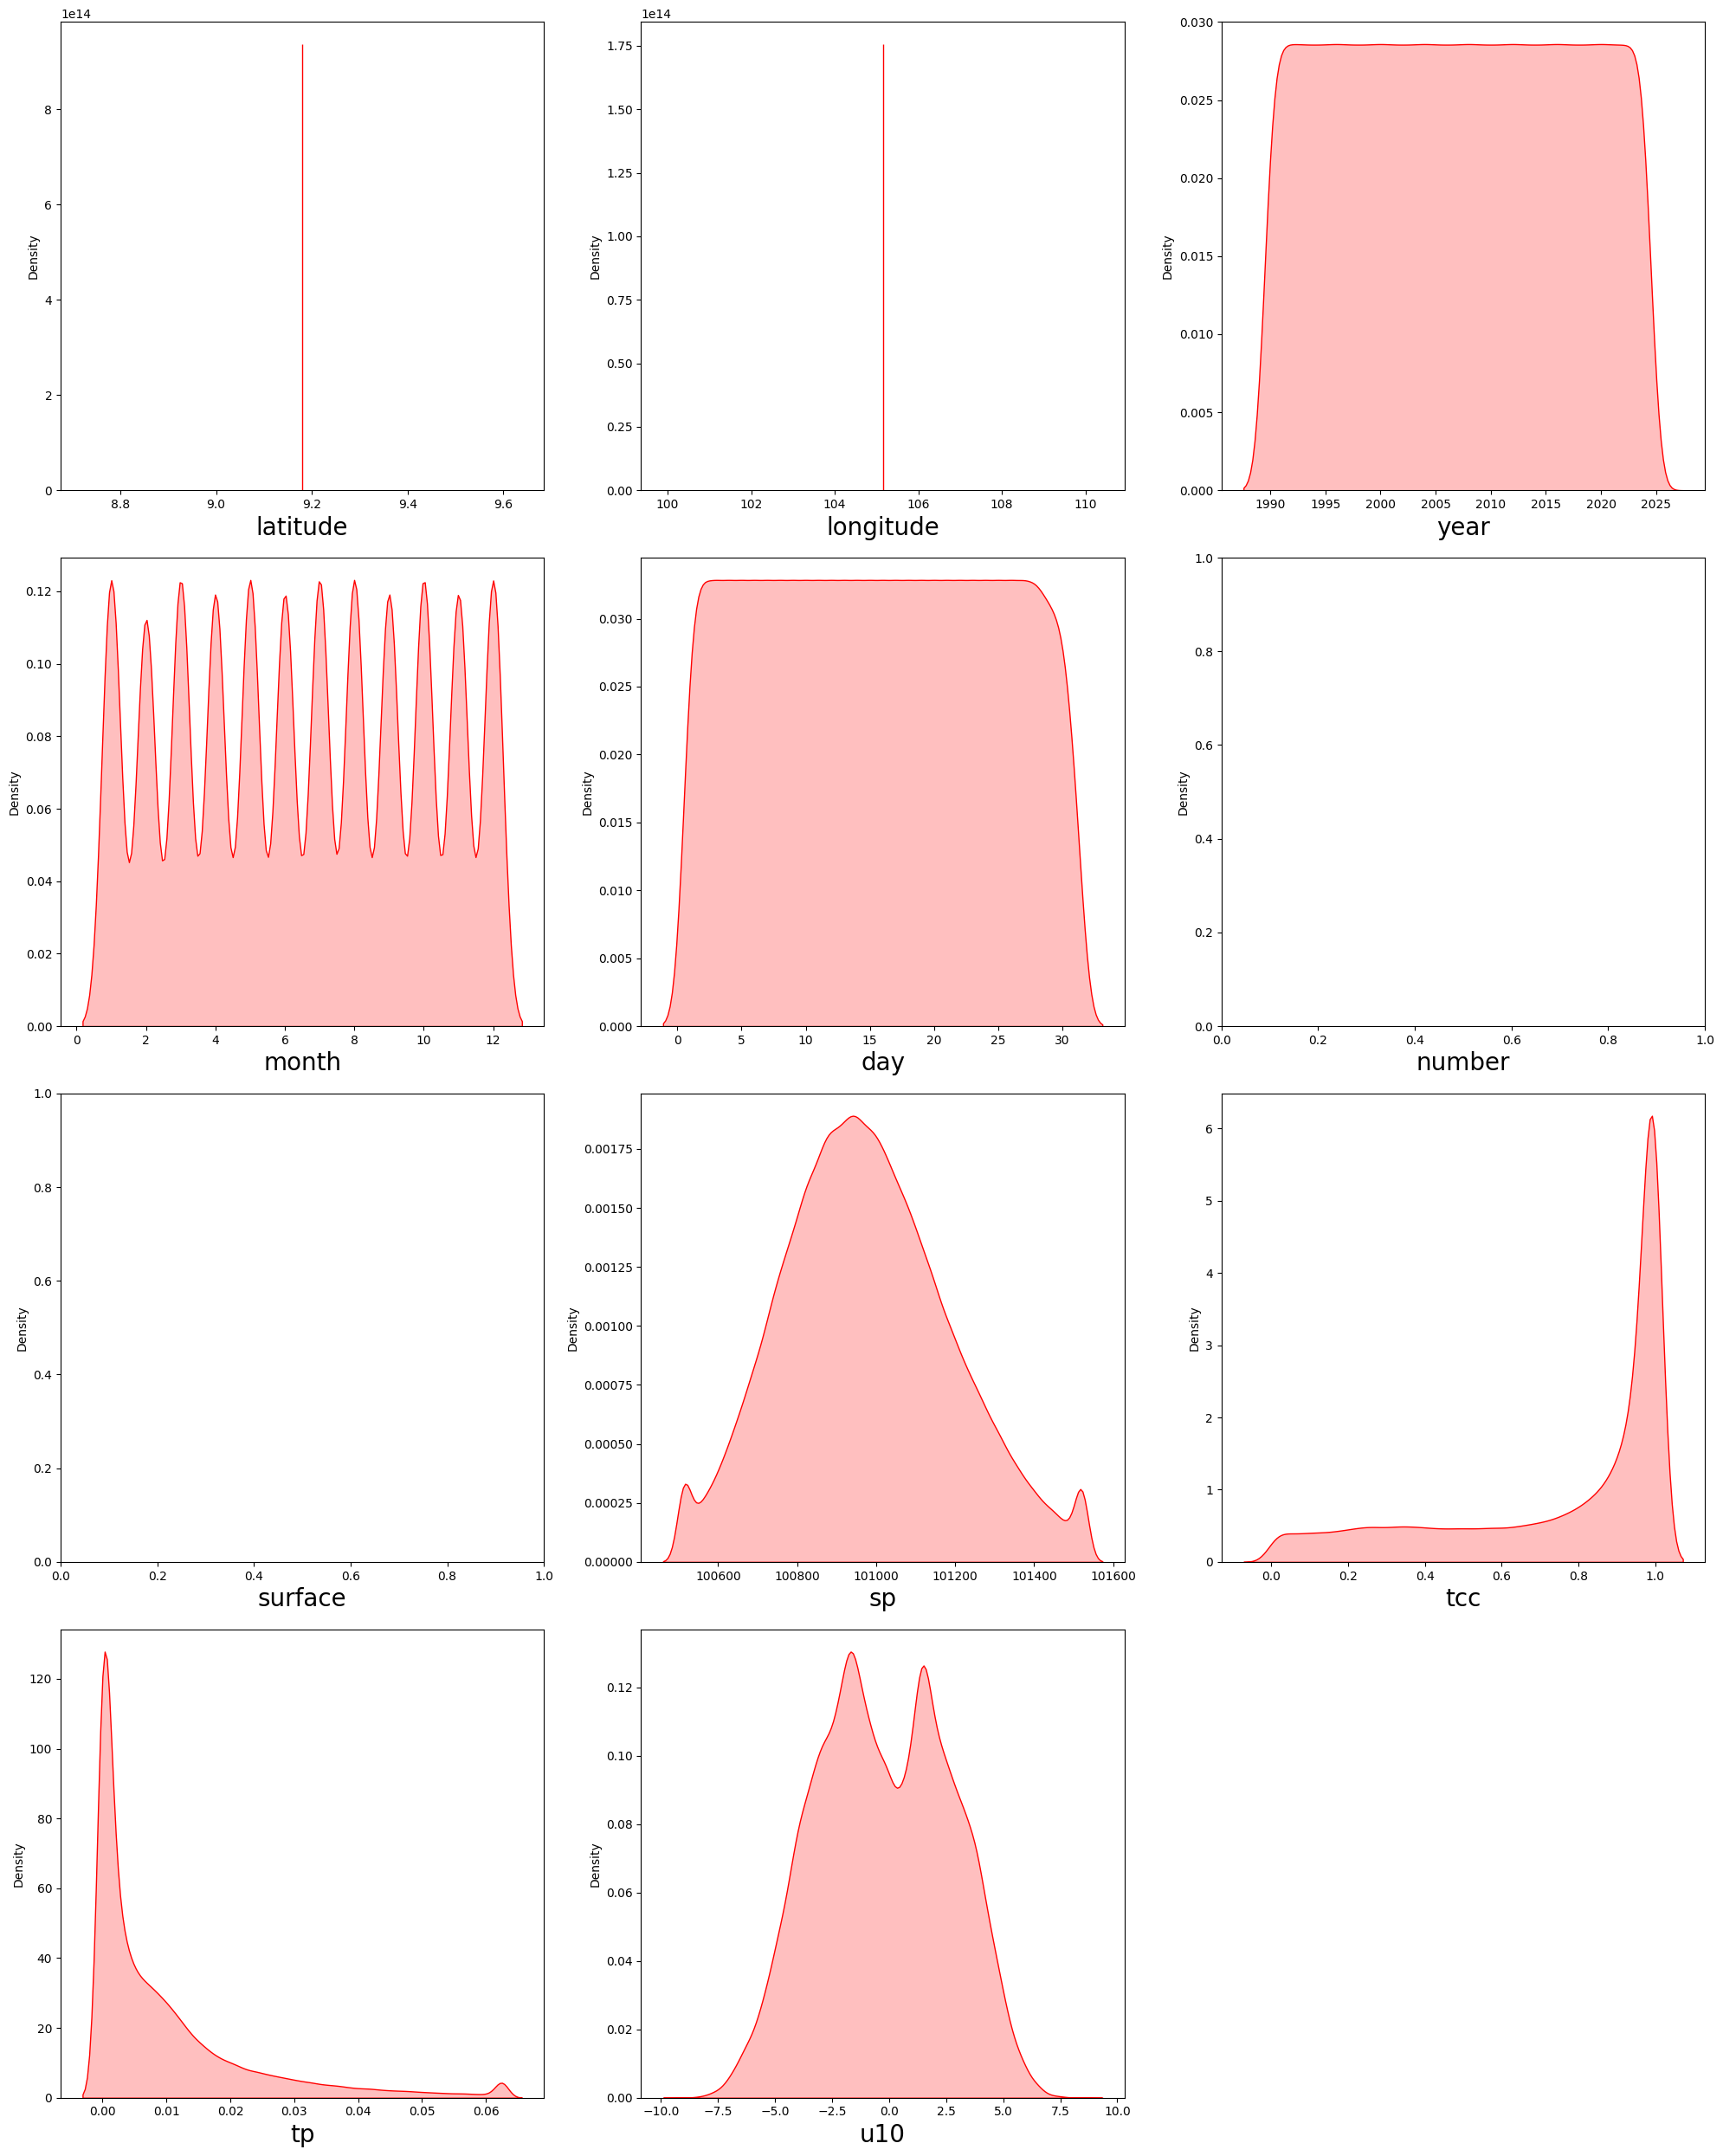

In [18]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in df.select_dtypes(include='number'):  # chỉ chọn cột số
    if plotnumber <= 11:
        ax = plt.subplot(4, 3, plotnumber)
        sns.kdeplot(data=df[column], color='r', shade=True)  # dùng kdeplot thay vì histplot
        plt.xlabel(column, fontsize=20)
        plotnumber += 1

plt.tight_layout()
plt.show()

##### <span style="color:tomato">Box Plots</span>

In [ ]:
# script.plot_Outlier(train_df, numerical.append(categorical.drop("class")), target="class")

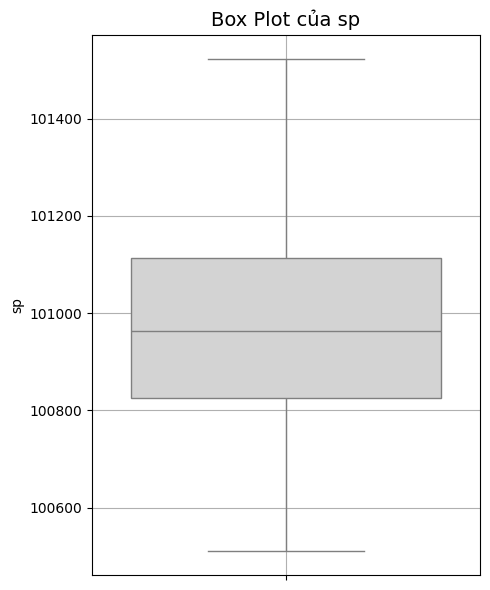

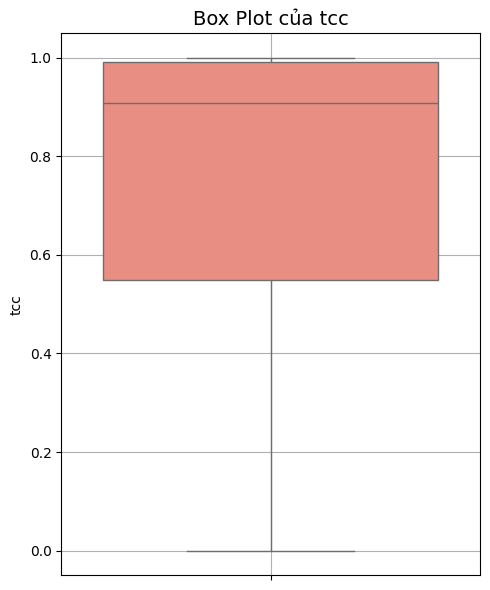

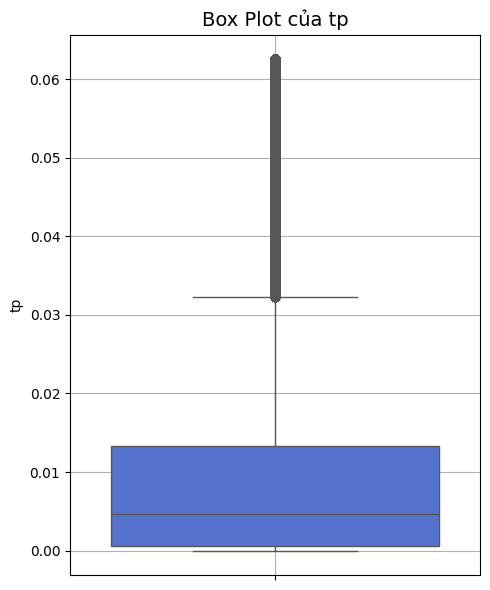

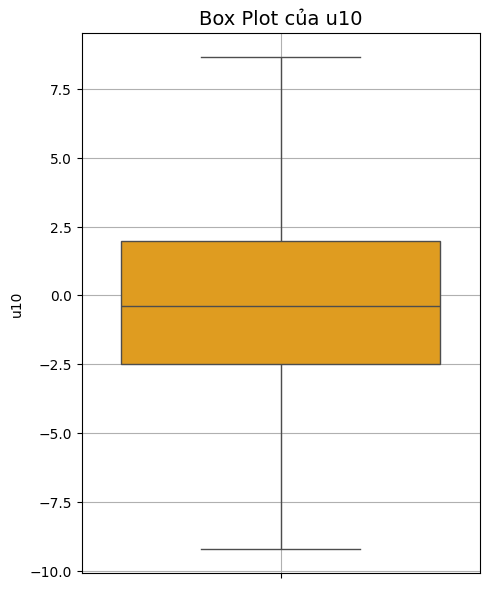

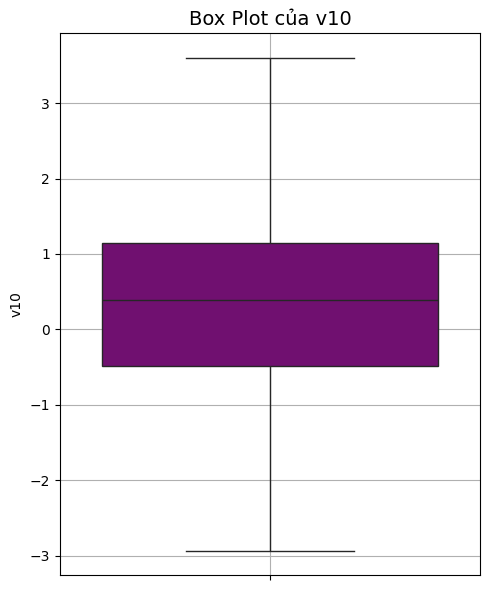

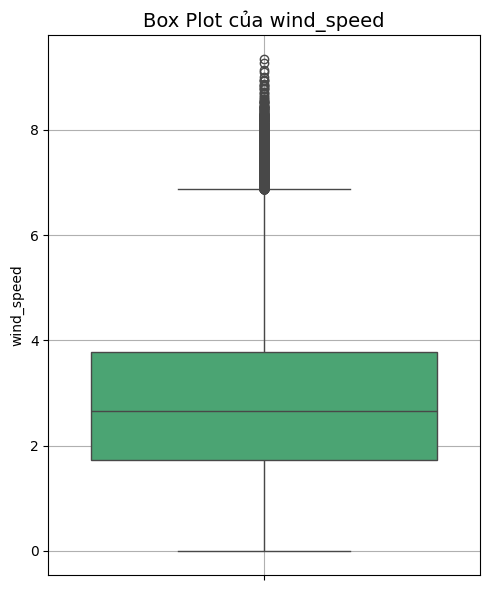

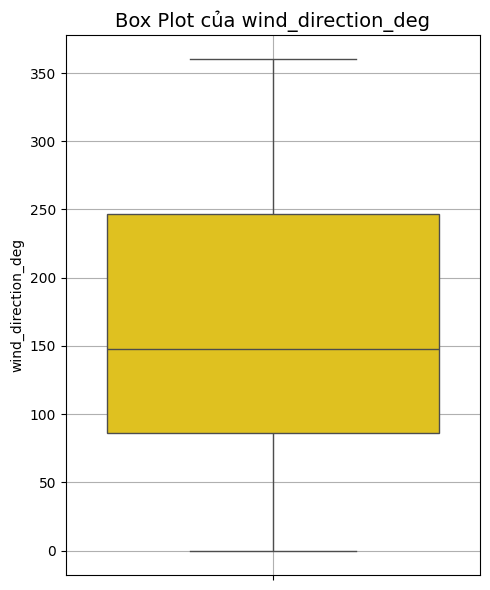

In [19]:
# Danh sách các biến cần vẽ box plot
variables = [
    'sp', 'tcc', 'tp', 'u10', 'v10', 'wind_speed', 'wind_direction_deg'
]

colors = {
    'sp': 'lightgray',
    'tcc': 'salmon',
    'tp': 'royalblue',
    'u10': 'orange',
    'v10': 'purple',
    'wind_speed': 'mediumseagreen',
    'wind_direction_deg': 'gold'
}

for var in variables:
    plt.figure(figsize=(5, 6))
    sns.boxplot(y=df[var], color=colors[var])
    plt.title(f"Box Plot của {var}", fontsize=14)
    plt.ylabel(var)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Distribution of Precipitation (tp)

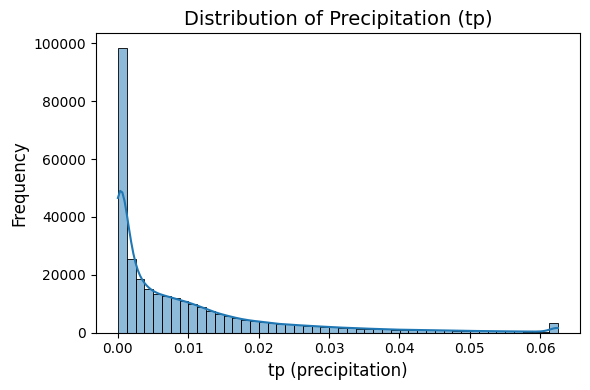

In [20]:
plt.figure(figsize=(6, 4))
sns.histplot(df['tp'], kde=True, bins=50)
plt.title('Distribution of Precipitation (tp)', fontsize=14)
plt.xlabel('tp (precipitation)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

Distribution of Wind Speed

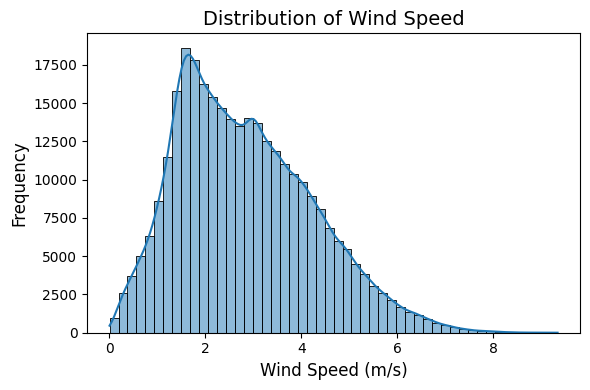

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(df['wind_speed'], kde=True, bins=50)
plt.title('Distribution of Wind Speed', fontsize=14)
plt.xlabel('Wind Speed (m/s)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

Distribution of Cloud Cover 

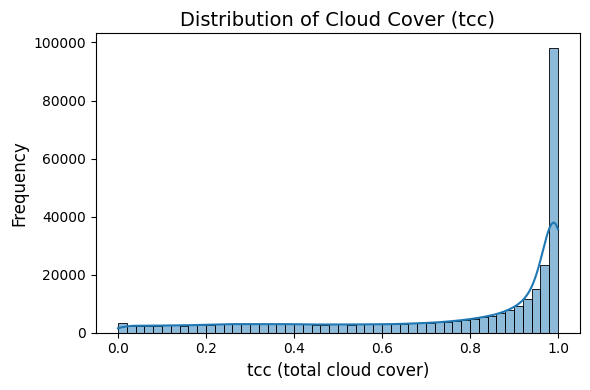

In [22]:
plt.figure(figsize=(6, 4))
sns.histplot(df['tcc'], kde=True, bins=50)
plt.title('Distribution of Cloud Cover (tcc)', fontsize=14)
plt.xlabel('tcc (total cloud cover)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

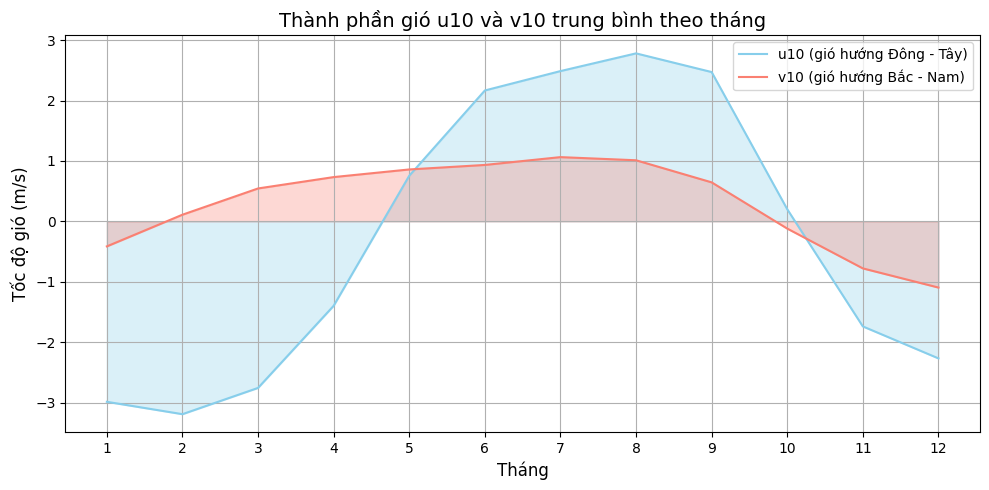

In [23]:
df.index = pd.to_datetime(df.index)
df['month'] = df.index.month


# Tính trung bình theo tháng
monthly_avg = df.groupby('month')[['u10', 'v10']].mean().reset_index()

# Vẽ stacked area chart (line plot dùng fill_between)
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg['month'], monthly_avg['u10'], label='u10 (gió hướng Đông - Tây)', color='skyblue')
plt.plot(monthly_avg['month'], monthly_avg['v10'], label='v10 (gió hướng Bắc - Nam)', color='salmon')
plt.fill_between(monthly_avg['month'], monthly_avg['u10'], alpha=0.3, color='skyblue')
plt.fill_between(monthly_avg['month'], monthly_avg['v10'], alpha=0.3, color='salmon')

plt.title("Thành phần gió u10 và v10 trung bình theo tháng", fontsize=14)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Tốc độ gió (m/s)", fontsize=12)
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### <span style="color:green">5.2. Relationship Plots</span>

##### <span style="color:tomato">Scatter</span>

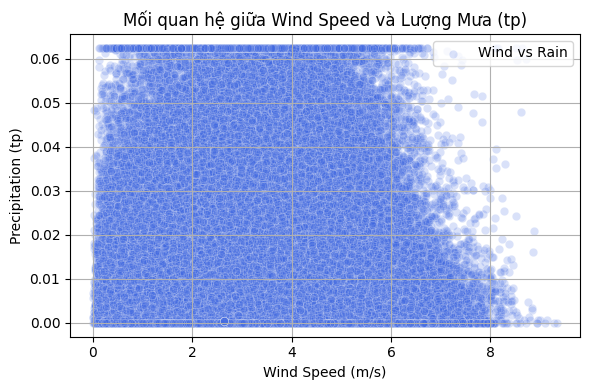

In [24]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='wind_speed', y='tp', alpha=0.2, color='royalblue', label='Wind vs Rain')
plt.title("Mối quan hệ giữa Wind Speed và Lượng Mưa (tp)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Precipitation (tp)")
plt.legend(loc='upper right')  # Thêm legend
plt.grid(True)
plt.tight_layout()
plt.show()


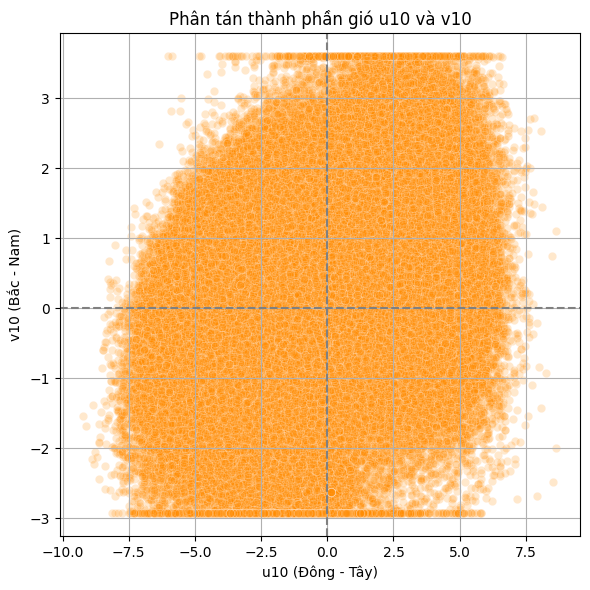

In [25]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='u10', y='v10', alpha=0.2, color='darkorange')
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.title("Phân tán thành phần gió u10 và v10")
plt.xlabel("u10 (Đông - Tây)")
plt.ylabel("v10 (Bắc - Nam)")
plt.grid(True)
plt.tight_layout()
plt.show()

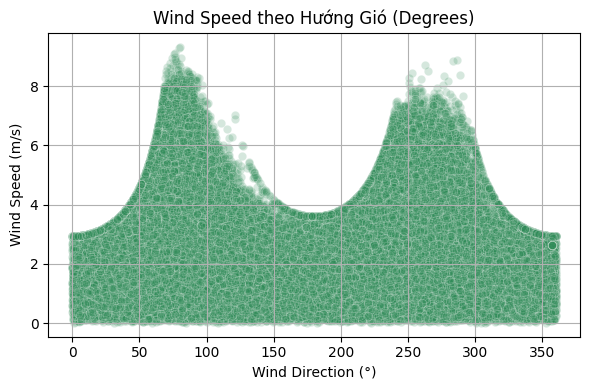

In [26]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='wind_direction_deg', y='wind_speed', alpha=0.2, color='seagreen')
plt.title("Wind Speed theo Hướng Gió (Degrees)")
plt.xlabel("Wind Direction (°)")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()

##### <span style="color:tomato">Bar Charts</span>

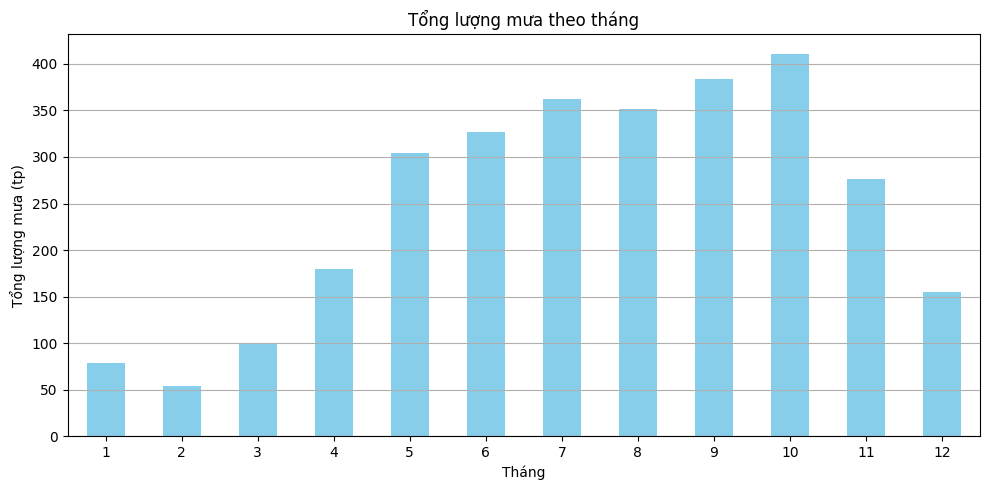

In [27]:
rain_monthly = df.groupby('month')['tp'].sum()

plt.figure(figsize=(10, 5))
rain_monthly.plot(kind='bar', color='skyblue')
plt.title("Tổng lượng mưa theo tháng")
plt.xlabel("Tháng")
plt.ylabel("Tổng lượng mưa (tp)")
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# # cols_not_included = ["class"]
# num_cols = len(categorical) + len(numerical)

# # Xác định số hàng và số cột hợp lý
# ncols = 3  # Số biểu đồ trên mỗi hàng
# nrows = int(np.ceil(num_cols / ncols))  # Tính số hàng cần thiết

# fig, axes = plt.subplots(
#     ncols   = ncols, 
#     nrows   = nrows, 
#     figsize = (5*ncols, 4*nrows)
# )
# axes = axes.flatten()  # chuyển mảng 2 chiều thành 1 chiều để dễ duyệt

# for i,column in enumerate(categorical.append(numerical)):
#     sns.barplot(
#         data = train_df, 
#         x    = column,
#         y    = "class", 
#         ax   = axes[i]
#     )
#     axes[i].set_title(f'Histogram of {column}')
#     axes[i].set_xlabel(column)
#     axes[i].set_ylabel('class')
#     axes[i].grid(True)

# # Ẩn các subplot dư nếu có
# for j in range(i+1, len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()

#### <span style="color:green">5.3. Annotated Visualizations</span>

1. Viet lai thanh ham
2. Tham so dau vao gom:
- data       = df, (dataframe) 
- start_time = "1990-01-01 00:00:00+07:00", (datetime)
- end_time   = "2025-01-01 00:00:00+07:00", (datetime)
- freq       = "1h"
3. Trend không thay ro trend o dau??? duong thang (line plot) dau -> coi lai kaggle
4. Coi ki lai code cua mn roi hay~ bat dau code
5. Them link tham khao cach code (kaggle, ytb, ...)

<img src="../image/1_KQ1zwf4DM_qeypL-n-m3ew.jpg">
<img src="../image/39815Components-of-Time-Series-Analysis.webp">

##### <span style="color:tomato">Trend</span>

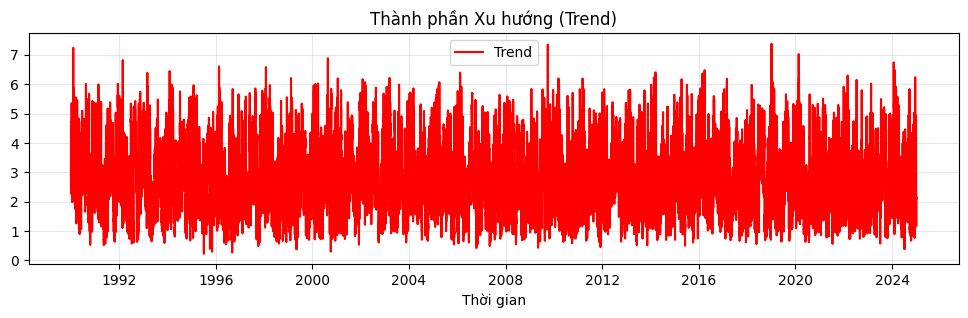

In [28]:
# Tính toán và vẽ xu hướng (dùng rolling mean hoặc decomposition)
trend = df['wind_speed'].rolling(window=24, center=True).mean()  # Giả sử dữ liệu theo giờ, window=24 để lấy xu hướng ngày

plt.figure(figsize=(12, 3))
plt.plot(trend, color='red', label='Trend')
plt.title('Thành phần Xu hướng (Trend)')
plt.xlabel('Thời gian')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

##### <span style="color:tomato">Seasonal</span>

In [ ]:
# Sử dụng seasonal_decompose từ statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Giả sử df đã được load và có cột 'time' ở định dạng datetime
result = seasonal_decompose(df['wind_speed'], model='additive', period=24)  # period=24 cho tính thời vụ theo ngày

# Vẽ thành phần Seasonal với trục x là thời gian thực tế
plt.figure(figsize=(12, 4))
plt.plot( result.seasonal, color='green', label='Seasonal')  # Sửa ở đây: thêm df['time']
plt.title('Thành phần Thời vụ (Seasonal)')
plt.xlabel('Thời gian')
plt.ylabel('Biên độ')
plt.grid(alpha=0.3)
plt.legend()

# Điều chỉnh giới hạn trục y nếu cần
plt.ylim(-0.5, 1.5)  # Căn cứ vào biểu đồ bạn cung cấp

plt.show()

##### <span style="color:tomato">Cyclical</span>

##### <span style="color:tomato">Irregular</span>

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot( result.resid, color='purple', label='Irregular')
plt.title('Thành phần Nhiễu (Irregular)')
plt.xlabel('Thời gian')
plt.axhline(y=0, color='gray', linestyle='--')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

#### <span style="color:green">5.4. Composition  Plots</span>

##### Thành phần gió u10 và v10 trung bình theo tháng

In [ ]:
df.index = pd.to_datetime(df.index)
df['month'] = df.index.month


# Tính trung bình theo tháng
monthly_avg = df.groupby('month')[['u10', 'v10']].mean().reset_index()

# Vẽ stacked area chart (line plot dùng fill_between)
plt.figure(figsize=(10, 5))
plt.plot(monthly_avg['month'], monthly_avg['u10'], label='u10 (gió hướng Đông - Tây)', color='skyblue')
plt.plot(monthly_avg['month'], monthly_avg['v10'], label='v10 (gió hướng Bắc - Nam)', color='salmon')
plt.fill_between(monthly_avg['month'], monthly_avg['u10'], alpha=0.3, color='skyblue')
plt.fill_between(monthly_avg['month'], monthly_avg['v10'], alpha=0.3, color='salmon')

plt.title("Thành phần gió u10 và v10 trung bình theo tháng", fontsize=14)
plt.xlabel("Tháng", fontsize=12)
plt.ylabel("Tốc độ gió (m/s)", fontsize=12)
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### Thành phần gió u10 và v10 trung bình theo năm

In [ ]:
df.index = pd.to_datetime(df.index)
df['year'] = df.index.year

# Trung bình theo năm
yearly_avg = df.groupby('year')[['u10', 'v10']].mean().reset_index()

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg['year'], yearly_avg['u10'], label='u10 (gió Đông - Tây)', color='skyblue')
plt.plot(yearly_avg['year'], yearly_avg['v10'], label='v10 (gió Bắc - Nam)', color='salmon')
plt.fill_between(yearly_avg['year'], yearly_avg['u10'], alpha=0.3, color='skyblue')
plt.fill_between(yearly_avg['year'], yearly_avg['v10'], alpha=0.3, color='salmon')

plt.locator_params(axis='x', nbins=10) 

# Label & layout
plt.title("Thành phần gió u10 và v10 trung bình theo năm", fontsize=14)
plt.xlabel("Năm", fontsize=12)
plt.ylabel("Tốc độ gió (m/s)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()